<a href="https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Networks

This notebook explains various ways of implementing single-layer and multi-layer neural networks. The implementations are arranged by concrete (explicit) to abstract order so that one can understand the process black-boxed by deep learning frameworks.

In order to focus on explaining the internals of training, this notebook uses a simple and classic example: *threshold logic units*.
Supposing $x=0$ as *false* and $x=1$ as *true*, single-layer neural networks can realize logic units such as AND ($\wedge$), OR ($\vee$), NOT ($\lnot$), and NAND ($|$). Multi-layer neural networks can realize logical compounds such as XOR.

| $x_1$ | $x_2$ | AND | OR | NAND | XOR |
| :---: |:-----:|:---:|:--:|:----:|:---:|
| 0 | 0 | 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 0 | 0 |


## Using numpy

In [1]:
import numpy as np

### Single-layer perceptron

A single layer perceptron predicts a binary label $\hat{y} \in \{0, 1\}$ for a given input vector $\boldsymbol{x} \in \mathbb{R}^d$ ($d$ presents the number of dimensions of inputs) by using the following formula,
$$
\hat{y} = g(\boldsymbol{w} \cdot \boldsymbol{x} + b) = g(w_1 x_1 + w_2 x_2 + ... + w_d x_d + b)
$$

Here, $\boldsymbol{w} \in \mathbb{R}^d$ is a weight vector; $b \in \mathbb{R}$ is a bias weight; and $g(.)$ denotes a Heaviside step function (we assume $g(0)=0$).

For simplicity, let us consider examples with two-dimensional inputs ($d=2$).
We can represent an input vector $\boldsymbol{x} \in \mathbb{R}^2$ and weight vector $\boldsymbol{w} \in \mathbb{R}^2$ with `numpy.array`. We also define the bias term $b$.

In [2]:
x = np.array([0, 1])
w = np.array([1.0, 1.0])
b = 1.0

The following code computes $\boldsymbol{w} \cdot \boldsymbol{x} + b$,


In [3]:
np.dot(x, w) + b

2.0

Applying Heaviside step function $g$ to the result yields a binary label $\hat{y}$,

In [4]:
np.heaviside(np.dot(x, w) + b, 0)

1.0

#### Including the bias term into the weight vector

For concise implementation, we include a bias term `b` as an additional dimension to the weight vector `w`. More concretely, we append an element with the value of $1$ to each input,
$$
\boldsymbol{x} = (0, 1) \rightarrow \boldsymbol{x}' = (0, 1, 1)
$$
and expand the dimension of the weight vector $\boldsymbol{w} \in \mathbb{R}^{3}$.

Then, the formula of the single-layer perceptron becomes,
$$
\hat{y} = g((w_1, w_2, w_3) \cdot \boldsymbol{x}') = g(w_1 x_1 + w_2 x_2 + w_3)
$$
In other words, $w_1$ and $w_2$ present weights for $x_1$ and $x_2$, respectively, and $w_3$ does a bias weight.

In [5]:
x = np.array([0, 1, 1])
w = np.array([1.0, 1.0, 1.0])

We can simplify the code to predict a binary label $\hat{y}$,

In [6]:
np.heaviside(np.dot(x, w), 0)

1.0

#### Training a NAND gate

Let's train a NAND gate with two inputs. More specifically, we want to find a weight vector $\boldsymbol{w}$ and a bias weight $b$ of a single-layer perceptron that realizes the truth table of the NAND gate: $\{0,1\}^2 \to \{0,1\}$.

| $x_1$ | $x_2$ | $y$  |
| :---: |:-----:|:----:|
| 0 | 0 | 1|
| 0 | 1 | 1|
| 1 | 0 | 1|
| 1 | 1 | 0|

We convert the truth table into a training set consisting of all mappings of the NAND gate,
$$
\boldsymbol{x}_1 = (0, 0), y_1 = 1 \\
\boldsymbol{x}_2 = (0, 1), y_2 = 1 \\
\boldsymbol{x}_3 = (1, 0), y_3 = 1 \\
\boldsymbol{x}_4 = (1, 1), y_4 = 0 \\
$$

As explained earlier, we include the bias term into the last dimension.
$$
\boldsymbol{x}'_1 = (0, 0, 1), y_1 = 1 \\
\boldsymbol{x}'_2 = (0, 1, 1), y_2 = 1 \\
\boldsymbol{x}'_3 = (1, 0, 1), y_3 = 1 \\
\boldsymbol{x}'_4 = (1, 1, 1), y_4 = 0 \\
$$

The code below implements Rosenblatt's perceptron algorithm with a fixed number of iterations (50 times). We use a constant learning rate 0.5 for simplicity.


In [7]:
import random
import numpy as np

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([0, 0, 0, 1])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(50):
    # Pick an instance index (i) at random.
    i = random.choice(range(len(y)))
    # Predict the label for the instance x[i] with the current parameter w.
    y_pred = np.heaviside(np.dot(x[i], w), 0)
    # Show the detail of the instance and the current parameter.
    print(f'#{t}: i={i}, x={x[i]}, w={w}, y={y[i]}, y_pred={y_pred}, y_err={y[i] - y_pred}')
    # Update the parameter.
    w += (y[i] - y_pred) * eta * x[i]

#0: i=0, x=[0 0 1], w=[0. 0. 0.], y=0, y_pred=0.0, y_err=0.0
#1: i=3, x=[1 1 1], w=[0. 0. 0.], y=1, y_pred=0.0, y_err=1.0
#2: i=2, x=[1 0 1], w=[0.5 0.5 0.5], y=0, y_pred=1.0, y_err=-1.0
#3: i=0, x=[0 0 1], w=[0.  0.5 0. ], y=0, y_pred=0.0, y_err=0.0
#4: i=1, x=[0 1 1], w=[0.  0.5 0. ], y=0, y_pred=1.0, y_err=-1.0
#5: i=3, x=[1 1 1], w=[ 0.   0.  -0.5], y=1, y_pred=0.0, y_err=1.0
#6: i=1, x=[0 1 1], w=[0.5 0.5 0. ], y=0, y_pred=1.0, y_err=-1.0
#7: i=3, x=[1 1 1], w=[ 0.5  0.  -0.5], y=1, y_pred=0.0, y_err=1.0
#8: i=0, x=[0 0 1], w=[1.  0.5 0. ], y=0, y_pred=0.0, y_err=0.0
#9: i=3, x=[1 1 1], w=[1.  0.5 0. ], y=1, y_pred=1.0, y_err=0.0
#10: i=2, x=[1 0 1], w=[1.  0.5 0. ], y=0, y_pred=1.0, y_err=-1.0
#11: i=1, x=[0 1 1], w=[ 0.5  0.5 -0.5], y=0, y_pred=0.0, y_err=0.0
#12: i=0, x=[0 0 1], w=[ 0.5  0.5 -0.5], y=0, y_pred=0.0, y_err=0.0
#13: i=2, x=[1 0 1], w=[ 0.5  0.5 -0.5], y=0, y_pred=0.0, y_err=0.0
#14: i=3, x=[1 1 1], w=[ 0.5  0.5 -0.5], y=1, y_pred=1.0, y_err=0.0
#15: i=1, x=[0 1 1]

We can confirm the learned parameter and classification results.

In [8]:
w

array([ 0.5,  0.5, -0.5])

In [9]:
np.heaviside(np.dot(x, w), 0)

array([0., 0., 0., 1.])

### Single-layer perceptron with mini-batch

It is desireable to reduce execusions run by the Python interpreter, which is extremely slow. The common technique to speed up a machine-learning code written in Python is to execute computations within the matrix library (e.g., numpy).

The single-layer perceptron makes predictions for four inputs,
$$
\hat{y}_1 = g(\boldsymbol{x}_1 \cdot \boldsymbol{w}) \\
\hat{y}_2 = g(\boldsymbol{x}_2 \cdot \boldsymbol{w}) \\
\hat{y}_3 = g(\boldsymbol{x}_3 \cdot \boldsymbol{w}) \\
\hat{y}_4 = g(\boldsymbol{x}_4 \cdot \boldsymbol{w}) \\
$$

Here, we define $\hat{Y} \in \mathbb{R}^{4 \times 1}$ and $X \in \mathbb{R}^{4 \times d}$ as,
$$
\hat{Y} = \begin{pmatrix} 
  \hat{y}_1 \\ 
  \hat{y}_2 \\ 
  \hat{y}_3 \\ 
  \hat{y}_4 \\ 
\end{pmatrix},
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}
$$

Then, we can write the four predictions in one dot-product computation,
$$
\hat{Y} = X \cdot \boldsymbol{w}
$$

The code below implements this idea. The function `np.heaviside()` yields a vector corresponding to the four predictions, applying the step function for every element of the argument.

This technique is frequently used in mini-batch training.

In [10]:
import numpy as np

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(10):
    y_pred = np.heaviside(np.dot(x, w), 0)
    print(f'#{t}: w={w}, Y={y}, Ypred={y_pred}, Yerr={y-y_pred}, dw={np.dot((y - y_pred), x)}')
    w += np.dot((y - y_pred), x)

#0: w=[0. 0. 0.], Y=[1 1 1 0], Ypred=[0. 0. 0. 0.], Yerr=[1. 1. 1. 0.], dw=[1. 1. 3.]
#1: w=[1. 1. 3.], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#2: w=[0. 0. 2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#3: w=[-1. -1.  1.], Y=[1 1 1 0], Ypred=[1. 0. 0. 0.], Yerr=[0. 1. 1. 0.], dw=[1. 1. 2.]
#4: w=[0. 0. 3.], Y=[1 1 1 0], Ypred=[1. 1. 1. 1.], Yerr=[ 0.  0.  0. -1.], dw=[-1. -1. -1.]
#5: w=[-1. -1.  2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#6: w=[-1. -1.  2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#7: w=[-1. -1.  2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#8: w=[-1. -1.  2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]
#9: w=[-1. -1.  2.], Y=[1 1 1 0], Ypred=[1. 1. 1. 0.], Yerr=[0. 0. 0. 0.], dw=[0. 0. 0.]


We can confirm the learned parameter and classification results.

In [11]:
w

array([-1., -1.,  2.])

In [12]:
np.heaviside(np.dot(x, w), 0)

array([1., 1., 1., 0.])

### Stochastic gradient descent (SGD) with mini-batch

In [13]:
import numpy as np

def sigmoid(v):
    return 1.0 / (1 + np.exp(-v))

# Training data for NAND.
x = np.array([
    [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
    ])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])

eta = 0.5
for t in range(100):
    y_pred = sigmoid(np.dot(x, w))
    print(f'#{t}: w={w}, Y={y}, Ypred={y_pred}, Yerr={y-y_pred}, dw={np.dot((y - y_pred), x)}')
    w -= np.dot((y_pred - y), x)

#0: w=[0. 0. 0.], Y=[1 1 1 0], Ypred=[0.5 0.5 0.5 0.5], Yerr=[ 0.5  0.5  0.5 -0.5], dw=[0. 0. 1.]
#1: w=[0. 0. 1.], Y=[1 1 1 0], Ypred=[0.73105858 0.73105858 0.73105858 0.73105858], Yerr=[ 0.26894142  0.26894142  0.26894142 -0.73105858], dw=[-0.46211716 -0.46211716  0.07576569]
#2: w=[-0.46211716 -0.46211716  1.07576569], Y=[1 1 1 0], Ypred=[0.74569184 0.64877263 0.64877263 0.53781052], Yerr=[ 0.25430816  0.35122737  0.35122737 -0.53781052], dw=[-0.18658315 -0.18658315  0.41895238]
#3: w=[-0.64870031 -0.64870031  1.49471806], Y=[1 1 1 0], Ypred=[0.81678537 0.69973111 0.69973111 0.54916993], Yerr=[ 0.18321463  0.30026889  0.30026889 -0.54916993], dw=[-0.24890104 -0.24890104  0.23458248]
#4: w=[-0.89760135 -0.89760135  1.72930054], Y=[1 1 1 0], Ypred=[0.84932293 0.6967141  0.6967141  0.48353042], Yerr=[ 0.15067707  0.3032859   0.3032859  -0.48353042], dw=[-0.18024452 -0.18024452  0.27371846]
#5: w=[-1.07784586 -1.07784586  2.003019  ], Y=[1 1 1 0], Ypred=[0.88111369 0.71609499 0.71609499

In [14]:
w

array([-5.59504346, -5.59504346,  8.57206068])

In [15]:
sigmoid(np.dot(x, w))

array([0.99981071, 0.95152498, 0.95152498, 0.06798725])

## Automatic differentiation

Consider a loss function,
$$
l_{\boldsymbol{x}}(\boldsymbol{w}) = - \log \sigma(\boldsymbol{w} \cdot \boldsymbol{x}) = - \log \frac{1}{1 + e^{-\boldsymbol{w} \cdot \boldsymbol{x}}}
$$

This section shows implementations in different libraries of deep learning for computing the loss value $l_{\boldsymbol{x}}(\boldsymbol{w})$ and gradients $\frac{\partial l_{\boldsymbol{x}}(\boldsymbol{w})}{\partial \boldsymbol{w}}$ when $\boldsymbol{x} = (1, 1, 1)$ and $\boldsymbol{w} = (1, 1, -1.5)$.

### Using autograd

See: https://github.com/HIPS/autograd

In [16]:
import autograd
import autograd.numpy as np

def loss(w, x):
    return -np.log(1.0 / (1 + np.exp(-np.dot(x, w))))

x = np.array([1, 1, 1])
w = np.array([1.0, 1.0, -1.5])

grad_loss = autograd.grad(loss)
print(loss(w, x))
print(grad_loss(w, x))

0.47407698418010663
[-0.37754067 -0.37754067 -0.37754067]


### Using pytorch

See: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [17]:
import torch

dtype = torch.float

x = torch.tensor([1, 1, 1], dtype=dtype)
w = torch.tensor([1.0, 1.0, -1.5], dtype=dtype, requires_grad=True)

loss = -torch.dot(x, w).sigmoid().log()
loss.backward()
print(loss.item())
print(w.grad)

0.4740769565105438
tensor([-0.3775, -0.3775, -0.3775])


### Using TensorFlow Eager

See: https://www.tensorflow.org/guide/autodiff

In [18]:
import tensorflow as tf

dtype = tf.float32

x = tf.constant([1, 1, 1], dtype=dtype, name='x')
w = tf.Variable([1.0, 1.0, -1.5], dtype=dtype, name='w')

with tf.GradientTape() as tape:
    loss = -tf.math.log(tf.math.sigmoid(tf.tensordot(x, w, 1)))

print(loss.numpy())
print(tape.gradient(loss, w))

0.47407696
tf.Tensor([-0.37754062 -0.37754062 -0.37754062], shape=(3,), dtype=float32)


### Using JAX

See: https://github.com/google/jax

In [19]:
import jax
import jax.numpy as jnp

def loss(w, x):
    return -jnp.log(1.0 / (1 + jnp.exp(-jnp.dot(x, w))))

x = jnp.array([1, 1, 1])
w = jnp.array([1.0, 1.0, -1.5])

grad_loss = jax.jit(jax.grad(loss))
print(loss(w, x))
print(grad_loss(w, x))

0.47407696
[-0.37754068 -0.37754068 -0.37754068]


## Implementing neural networks with pytorch

### Single-layer neural network using automatic differentiation

In [20]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
w = torch.randn(3, 1, dtype=dtype, requires_grad=True)

loss_history = []               # Used for plotting loss values.

eta = 0.5
for t in range(100):
    # y_pred = \sigma(x \cdot w)
    y_pred = x.mm(w).sigmoid()
    ll = y * y_pred + (1 - y) * (1 - y_pred)
    loss = -ll.log().sum()      # The loss value.
    loss.backward()             # Compute the gradients of the loss.

    loss_history.append(loss.item())    # Record the loss value.
    print(f'#{t}: w={w.t().data[0].numpy()}, loss={loss.item()}')

    with torch.no_grad():
        w -= eta * w.grad       # Update weights using SGD.        
        w.grad.zero_()          # Clear the gradients for the next iteration.

#0: w=[ 0.8422668  -2.4835694  -0.31447735], loss=4.315868377685547
#1: w=[ 0.96582085 -2.0742466   0.5693506 ], loss=2.8084659576416016
#2: w=[ 0.87023866 -1.8492962   1.0636135 ], loss=2.3291563987731934
#3: w=[ 0.67283785 -1.7664076   1.3379743 ], loss=2.111574172973633
#4: w=[ 0.45147464 -1.7440573   1.5232825 ], loss=1.9519271850585938
#5: w=[ 0.23370385 -1.7452822   1.6724864 ], loss=1.8177108764648438
#6: w=[ 0.02833837 -1.7562569   1.8052629 ], loss=1.7020235061645508
#7: w=[-0.16241995 -1.7720447   1.9289858 ], loss=1.6016154289245605
#8: w=[-0.33875015 -1.7909373   2.0465095 ], loss=1.5140140056610107
#9: w=[-0.5016316 -1.8123198  2.1590571], loss=1.4371535778045654
#10: w=[-0.65225446 -1.8359096   2.267265  ], loss=1.369302749633789
#11: w=[-0.7918068 -1.8615077  2.3715494], loss=1.3090195655822754
#12: w=[-0.9214014 -1.8889263  2.4722307], loss=1.255110740661621
#13: w=[-1.042054  -1.9179759  2.5695784], loss=1.206590175628662
#14: w=[-1.1546803 -1.948466   2.6638274], loss

Text(0, 0.5, 'Loss')

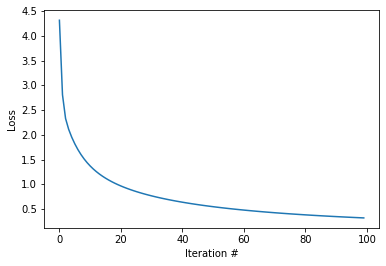

In [21]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [22]:
w

tensor([[-4.3029],
        [-4.3065],
        [ 6.6481]], requires_grad=True)

In [23]:
x.mm(w).sigmoid()

tensor([[0.9987],
        [0.9123],
        [0.9126],
        [0.1233]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network using automatic differentiation

In [24]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
w1 = torch.randn(3, 2, dtype=dtype, requires_grad=True)
w2 = torch.randn(2, 1, dtype=dtype, requires_grad=True)
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

loss_history = []               # Used for plotting loss values.

eta = 0.5
for t in range(1000):
    # y_pred = \sigma(w_2 \cdot \sigma(x \cdot w_1) + b_2)
    y_pred = x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()
    ll = y * y_pred + (1 - y) * (1 - y_pred)
    loss = -ll.log().sum()
    loss.backward()

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')

    with torch.no_grad():
        # Update weights using SGD.
        w1 -= eta * w1.grad
        w2 -= eta * w2.grad
        b2 -= eta * b2.grad
        
        # Clear the gradients for the next iteration.
        w1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

Text(0, 0.5, 'Loss')

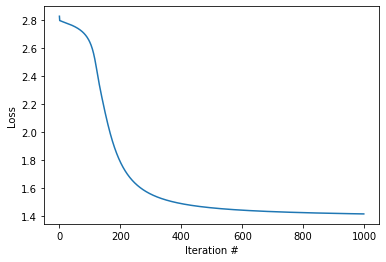

In [25]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [26]:
print(w1)
print(w2)
print(b2)

tensor([[ 7.3079, -8.3155],
        [ 3.2496,  5.5549],
        [-9.4242,  6.2355]], requires_grad=True)
tensor([[-6.9393],
        [-6.3822]], requires_grad=True)
tensor([[6.3800]], requires_grad=True)


In [27]:
x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()

tensor([[0.5024],
        [0.4959],
        [0.9928],
        [0.0063]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with high-level NN modules

In [28]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Used for plotting loss values.
loss_history = []

eta = 0.5
for t in range(100):
    y_pred = model(x)                   # Make predictions.
    loss = loss_fn(y_pred, y)           # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    model.zero_grad()                   # Zero-clear the gradients.
    loss.backward()                     # Compute the gradients.
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   # Update the parameters using SGD.

Text(0, 0.5, 'Loss')

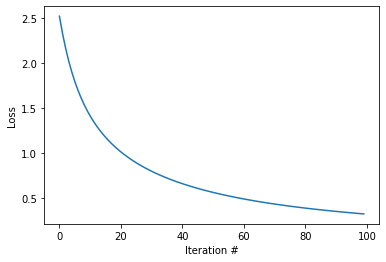

In [29]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [30]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-4.2640, -4.2636]])),
             ('0.bias', tensor([6.5874]))])

In [31]:
model(x).sigmoid()

tensor([[0.9986],
        [0.9108],
        [0.9108],
        [0.1256]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network with high-level NN modules

In [32]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),   # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(),                 # Sigmoid function
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Used for plotting loss values.
loss_history = []

eta = 0.5
for t in range(1000):
    y_pred = model(x)                   # Make predictions.
    loss = loss_fn(y_pred, y)           # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    model.zero_grad()                   # Zero-clear the gradients.
    loss.backward()                     # Compute the gradients.
        
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad   # Update the parameters using SGD.

Text(0, 0.5, 'Loss')

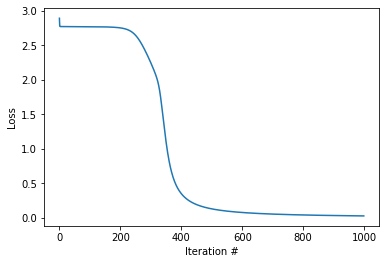

In [33]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [34]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-6.3015,  6.0285],
                      [-6.8029,  6.9892]])),
             ('0.bias', tensor([-3.2066,  3.4301])),
             ('2.weight', tensor([[ 11.3226, -10.6822]])),
             ('2.bias', tensor([4.9845]))])

In [35]:
model(x).sigmoid()

tensor([[0.0072],
        [0.9932],
        [0.9904],
        [0.0062]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with an optimizer.

In [36]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(100):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

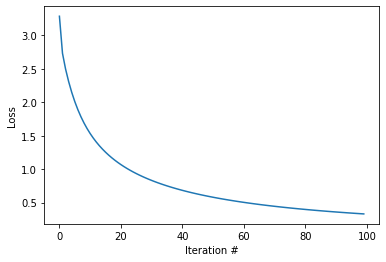

In [37]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [38]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-4.2292, -4.2297]])),
             ('0.bias', tensor([6.5363]))])

In [39]:
model(x).sigmoid()

tensor([[0.9986],
        [0.9094],
        [0.9095],
        [0.1276]], grad_fn=<SigmoidBackward>)

### Multi-layer neural networks using an optimizer

In [40]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),   # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(),                 # Sigmoid function
    torch.nn.Linear(2, 1, bias=True),   # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(1000):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

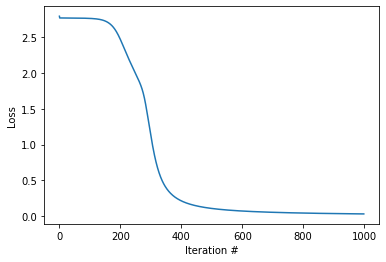

In [41]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [42]:
model.state_dict()

OrderedDict([('0.weight', tensor([[7.0890, 7.0496],
                      [5.0631, 5.0563]])),
             ('0.bias', tensor([-3.1950, -7.7478])),
             ('2.weight', tensor([[ 11.2128, -12.0568]])),
             ('2.bias', tensor([-5.1699]))])

In [43]:
model(x).sigmoid()

tensor([[0.0087],
        [0.9936],
        [0.9936],
        [0.0068]], grad_fn=<SigmoidBackward>)

### Single-layer neural network with a customizable NN class.

In [44]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network model.
class SingleLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_out):
        super(SingleLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_out, bias=True)

    def forward(self, x):
        return self.linear1(x)

model = SingleLayerNN(2, 1)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(100):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

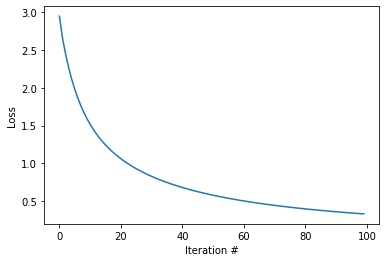

In [45]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [46]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[-4.2341, -4.2336]])),
             ('linear1.bias', tensor([6.5428]))])

In [47]:
model(x).sigmoid()

tensor([[0.9986],
        [0.9096],
        [0.9096],
        [0.1273]], grad_fn=<SigmoidBackward>)

### Multi-layer neural network with a customizable NN class.



In [48]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
                                        
# Define a neural network model.
class ThreeLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_hidden, d_out):
        super(ThreeLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_hidden, bias=True)
        self.linear2 = torch.nn.Linear(d_hidden, d_out, bias=True)

    def forward(self, x):
        return self.linear2(self.linear1(x).sigmoid())

model = ThreeLayerNN(2, 2, 1)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

# Used for plotting loss values.
loss_history = []

for t in range(1000):
    y_pred = model(x)           # Make predictions.
    loss = loss_fn(y_pred, y)   # Compute the loss.

    loss_history.append(loss.item())    # Record the loss value.
    #print(f'#{t}: loss={loss.item()}')
    
    optimizer.zero_grad()       # Zero-clear gradients.
    loss.backward()             # Compute the gradients.
    optimizer.step()            # Update the parameters using the gradients.

Text(0, 0.5, 'Loss')

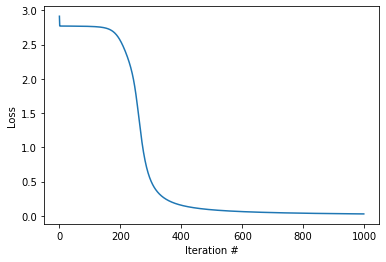

In [49]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iteration #')
plt.ylabel('Loss')

In [50]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[ 6.1067, -6.4026],
                      [ 6.9643, -6.8179]])),
             ('linear1.bias', tensor([-3.2413,  3.4460])),
             ('linear2.weight', tensor([[ 11.5497, -10.9221]])),
             ('linear2.bias', tensor([5.1071]))])

In [51]:
model(x).sigmoid()

tensor([[0.0064],
        [0.9914],
        [0.9940],
        [0.0055]], grad_fn=<SigmoidBackward>)